# Benchmarking tree search runtime

Here we'll test that the tree classes have the properties they're supposed to, compare which are faster at doing what, and make some plots of the various metrics.

In [14]:
from test import TreeTester
from trees import BinarySearchTree, AVLTree, SplayTree
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10
plt.style.use('fivethirtyeight')
%matplotlib inline

Let's create out tree objects, and have the Tester herper object insert values in them. It generates a sequence of integers [0, n], shuffles it once, and then inserts the values into each tree.

In [19]:
avl = AVLTree()
bst = BinarySearchTree()
splay = SplayTree()
tester = TreeTester({"BST": bst, "AVL": avl, "Splay": splay})
seq = tester.insertRandomElements(10000)

inerting 10000 shuffled values into BST
inerting 10000 shuffled values into AVL
inerting 10000 shuffled values into Splay


First, let's do a naive time comparison to see how fast search is in each tree. we'll measure it by depth: starting at the root level (level 0) we'll measure how long the average search for a node at that depth takes.

In [20]:
tester.compareDepthAccessTimes()

computing height
computing height
BST: timing access from depth 0 to depth 28
AVL: timing access from depth 0 to depth 28
Splay: timing access from depth 0 to depth 28


,AVL_mean,BST_mean,Splay_mean
0,0.000001,0.000003,0.000004
1,0.000002,0.000002,0.000005
2,0.000002,0.000002,0.000008
3,0.000002,0.000020,0.000008
4,0.000002,0.000003,0.000026
5,0.000003,0.000003,0.000012
6,0.000004,0.000005,0.000013
7,0.000004,0.000007,0.000016
8,0.000005,0.000007,0.000018
9,0.000007,0.000010,0.000019


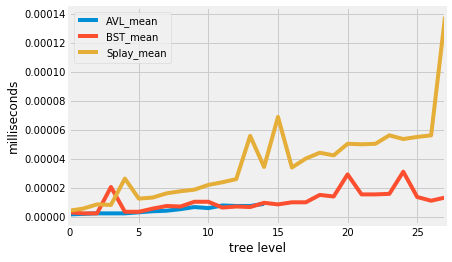

In [21]:
_.plot()
plt.xlabel('tree level')
plt.ylabel('milliseconds')
plt.show()

Different trees should perform best under different conditions (especially the more exotic species). This isn't the best way of testing that, but it is interesting. Clearly, since the AVL tree minimizes the number of levels while the Binary Search Tree and Splay trees don't, it has fewer levels.

It's not surprising that the Splay Tree performs terribly at the deeper levels, because it needs to transport that node all the way back to be the next root. In fact, this is an unfair and misleading comparison, because it's ignoring the fact that the AVL tree isn't doing any work to balance itself, while the Splay tree rebalances every time there's a search done.

### Simulating real-world usage

Here, we'll 